In [3]:
import os
import numpy as np
from sklearn.decomposition import PCA
import scipy as sp

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(font_scale=1.3)

## Снижение размерности фотографий лиц

Загрузим датасет человеческих лиц.
Выборка состоит из 280 изображений лиц, каждое имеет размер $32$x$32$.
Каждый пиксель принимает значения от $0$ до $255$.
Для того, чтобы работать с изображением как с вектором, матрица пикселей растянута в вектор размерности $32*32 = 1024$.

In [1]:
X = np.loadtxt('train_faces.npy')
print(X)
print(X.shape)

[[ 86. 115. 145. ... 114.  19.  28.]
 [112. 136. 154. ...  47.  48.  49.]
 [ 54.  51.  55. ...  88. 101. 115.]
 ...
 [136. 147. 146. ...  71.  72.  73.]
 [101. 133. 145. ...  73.  72.  70.]
 [164. 168. 171. ...  73.  73.  75.]]
(280, 1024)


Посмотрим, как вообще выглядят эти лица.

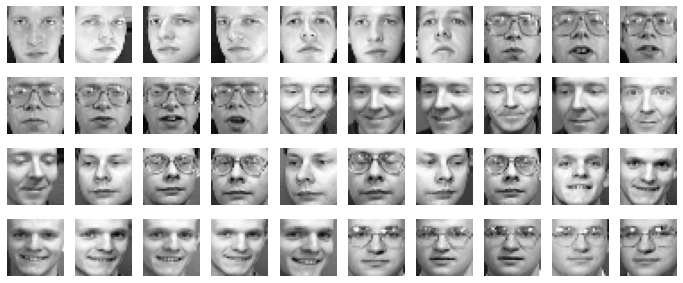

In [4]:
plt.figure(figsize=(12, 5))    
for i in range(40):
    plt.subplot(4, 10, i + 1)
    plt.imshow(X[i].reshape((32, 32)), cmap='gray')
    plt.axis('off')

Выборку лиц можно визуализировать с помощью PCA. Рассмотрим проекции на первые две главные компоненты.

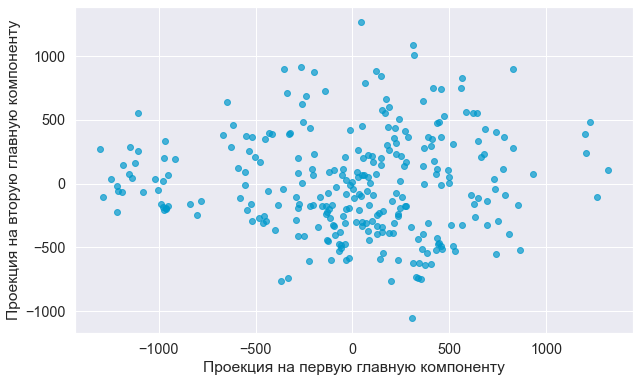

In [5]:
pca = PCA(n_components=2)
transform_X = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(transform_X[:, 0], transform_X[:, 1], 
            alpha=0.7, color='#0099CC')
plt.xlabel('Проекция на первую главную компоненту')
plt.ylabel('Проекция на вторую главную компоненту')
plt.show()

Посчитаем сингулярные числа по лицам.

In [6]:
singular_values = np.sqrt(sp.linalg.svdvals(X))
print(singular_values)

[270.02107555  81.76404121  71.92180336  63.85645457  60.47495063
  56.97681205  54.38612376  52.63991889  51.29444879  48.9306597
  48.05430541  46.27031825  44.57307096  44.23762041  43.12249147
  42.43873139  42.1382968   41.79402284  39.90162559  39.59301688
  39.38842827  38.59158176  37.78522122  37.44580732  37.33453722
  36.83974898  36.51562856  35.87708042  35.53168822  34.6576802
  34.19263315  33.77840437  33.20729287  33.05394887  32.67148983
  32.41788508  31.93664462  31.67958577  31.46609998  31.01900346
  30.69365023  30.66897852  30.46077067  30.20090206  30.13833702
  29.79712323  29.61987132  29.27109293  29.17493082  28.9992181
  28.7627508   28.62864934  28.38232255  28.25700151  28.02453193
  27.94107503  27.73590765  27.59999604  27.52359993  27.32994225
  27.13916253  26.95289744  26.72215879  26.62105914  26.46766421
  26.2913381   26.17518663  26.00199557  25.84704212  25.76791375
  25.70812539  25.45996892  25.31691508  25.24912485  25.19646767
  25.00534229

По сингулярным числам можно построить график доли необясненной дисперсии.

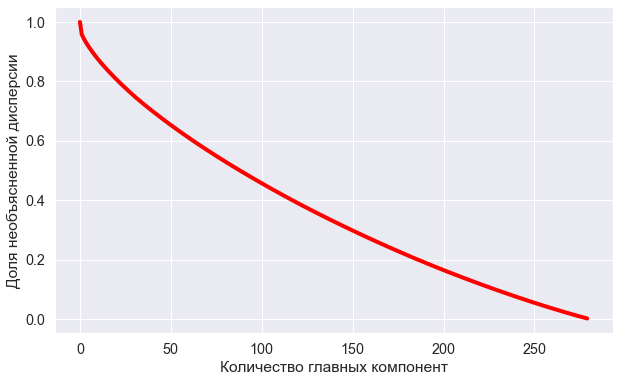

In [7]:
error = singular_values[::-1].cumsum() / singular_values.sum()
error = error[::-1]

plt.figure(figsize=(10, 6))
plt.plot(range(len(error)), error, c='red', linewidth=4)
plt.xlabel('Количество главных компонент')
plt.ylabel('Доля необъясненной дисперсии')
plt.show()

Теперь посмотрим на то, что такое главные компоненты.


In [8]:
pca = PCA(n_components=50)
transform_X = pca.fit_transform(X)

Ниже на первой строке изображено среднее лицо, которое получается путем усреднения всех лиц по выборке.
Далее в строчках изображены главные компоненты в порядке убывания их степени важности.

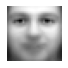

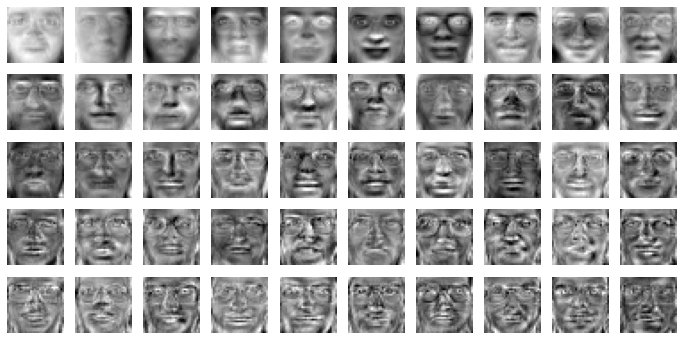

In [9]:
plt.figure(figsize=(1, 1))
plt.imshow(pca.mean_.reshape((32, 32)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(12, 6))    
for i in range(50):
    plt.subplot(5, 10, i + 1)
    plt.imshow(pca.components_[i].reshape((32, 32)), cmap='gray')
    plt.axis('off')

Посмотрим на то, как восстанавливаются лица по главным компонентам.
Для наглядности возьмем первые 10 компонент.

In [10]:
pca = PCA(n_components=10)
transform_X = pca.fit_transform(X)

Ниже в первой колонке изображено исходное лицо, во второй его приближение (проекция на первые 10 главных компонент).
В третьей колонке среднее лицо, и в следующих 10 колонках первые 10 главных компонент.
Над компонентами указаны коэффициенты, с которыми они входят в приближаемое лицо.

Стоит отметить, что все компоненты нормированны, однако при отрисовке они растягиваются до диаппазона [0, 255].
Поэтому коэффициенты относятся не к изображениям компонент, а к самим нормированным компонентам.

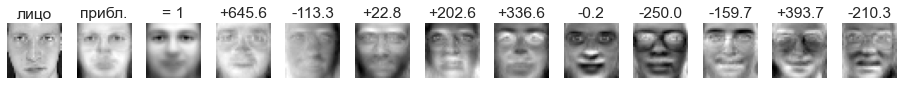

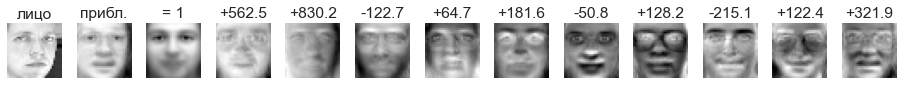

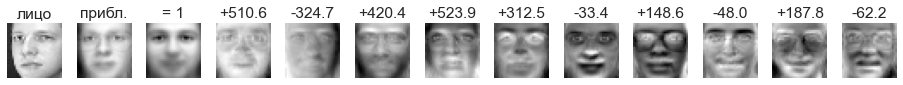

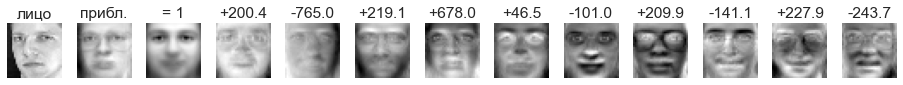

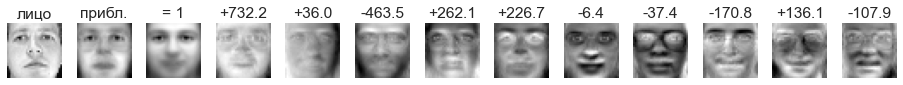

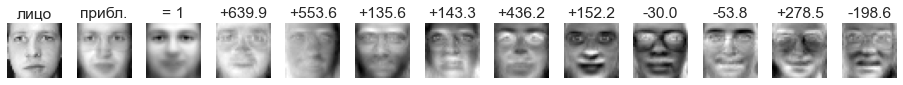

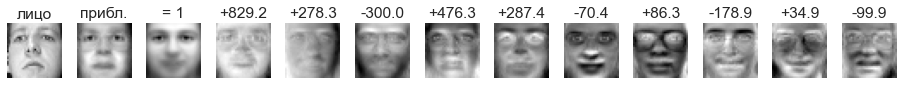

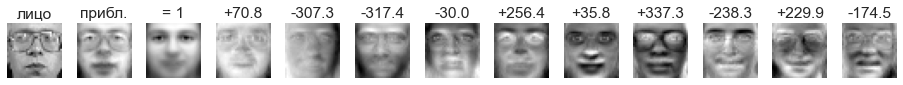

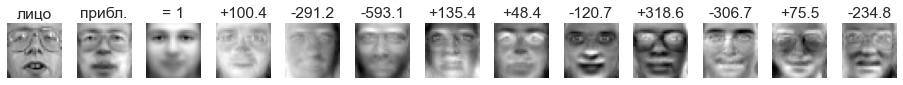

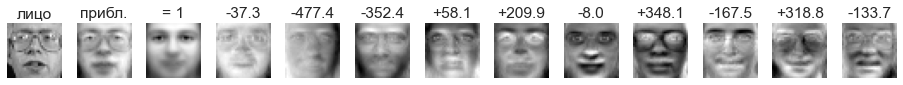

In [11]:
for i in range(10):
    X_hat = pca.inverse_transform(transform_X[i])
    plt.figure(figsize=(16, 1))
    
    plt.subplot(1, 13, 1)
    plt.imshow(X[i].reshape((32, 32)), cmap='gray')
    plt.axis('off')
    plt.title('лицо')
    
    plt.subplot(1, 13, 2)
    plt.imshow(X_hat.reshape((32, 32)), cmap='gray')
    plt.axis('off')
    plt.title('прибл.')
    
    plt.subplot(1, 13, 3)
    plt.imshow(pca.mean_.reshape((32, 32)), cmap='gray')
    plt.axis('off')
    plt.title('= 1')
    
    for j in range(10):
        plt.subplot(1, 13, 4 + j)
        plt.imshow(pca.components_[j].reshape((32, 32)), cmap='gray')
        plt.axis('off')
        plt.title('{}{:.1f}'.format('+' if transform_X[i, j] >= 0 else '', 
                                    transform_X[i, j]))
        
    plt.show()